In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("E:/HealthCompass/data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

Shape of dataset: (1338, 7)

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


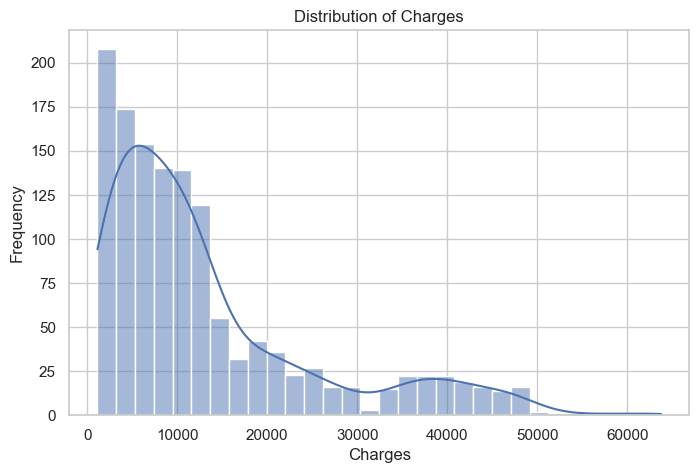

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

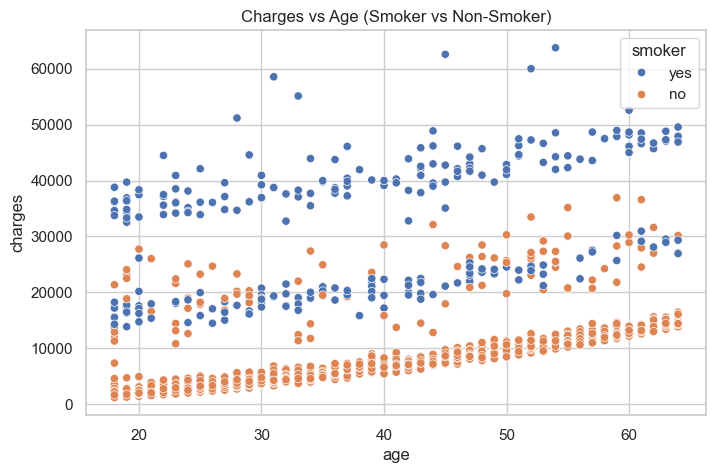

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (Smoker vs Non-Smoker)")
plt.show()

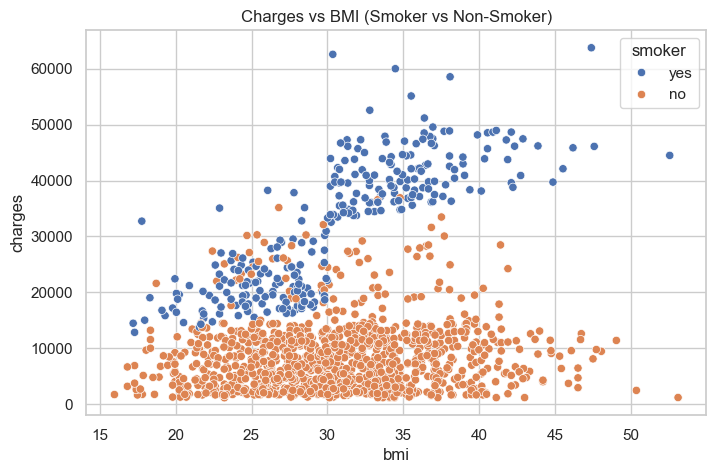

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (Smoker vs Non-Smoker)")
plt.show()

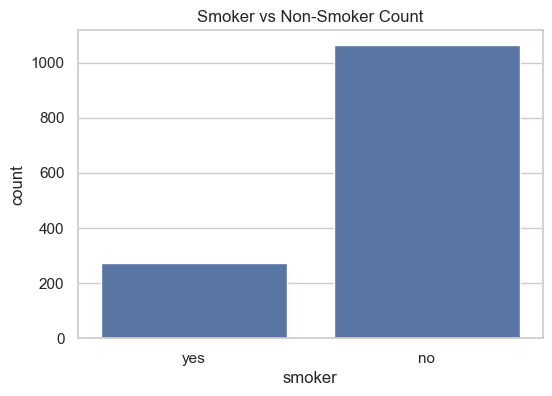

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.title("Smoker vs Non-Smoker Count")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19088\2082273024.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_counts = df[df['smoker']=="yes"].groupby("age_group").size()


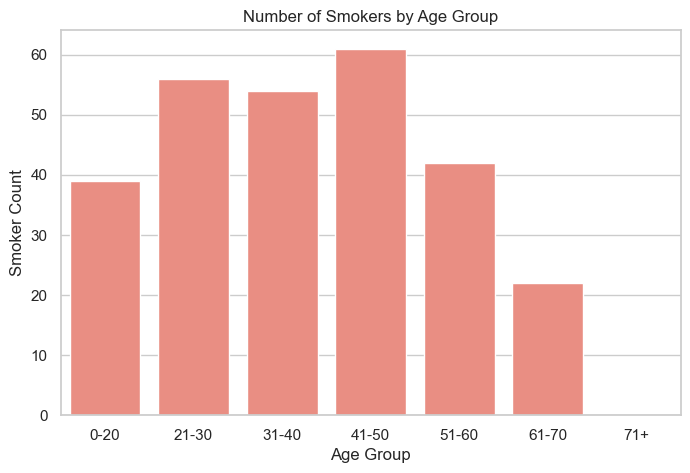

In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
smoker_counts = df[df['smoker']=="yes"].groupby("age_group").size()

plt.figure(figsize=(8,5))
sns.barplot(x=smoker_counts.index, y=smoker_counts.values, color="salmon")
plt.title("Number of Smokers by Age Group")
plt.ylabel("Smoker Count")
plt.xlabel("Age Group")
plt.show()